In [2]:
#linear algebra
import numpy as np

In [3]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATION

In [6]:
#Reading a csv file
df= pd.read_csv('water_potability.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The training-set has 3276 examples and 8 features + the target variable (potability). 8 of the features are floats and 1 is integer.

In [8]:
#Basic statistical details
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Above we can see that mean pH of water is 7, we can also see that turbidity of water ranges from 0.78 to 6.739. On top of that we can already detect some features, that contain missing values,like 'ph','sulfate','trihalomethanes' feature.

In [9]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [10]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [11]:
#Number of rows and columns(shape) of a dataset
df.shape

(3276, 10)

**Data Preprocessing (Data Cleaning)**

In [12]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We can see that ph, sulfate and trihalomethanes feature contains 491,781 and 162 null values.

Now here we find out means for each attribute or feature containing missing values as shown below:

In [13]:
print("ph mean:",df["ph"].mean())
print("Sulfate mean:",df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())

ph mean: 7.080794504276835
Sulfate mean: 333.7757766108135
Trihalomethanes mean: 66.39629294676803


We will fill our data having missing values with these average values.

In [14]:
df['ph'] = df['ph'].fillna(7.0)
df['Sulfate'] = df['Sulfate'].fillna(333.7)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.3)

In [15]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Hence, you can observe that all the null values has been replaced by average values and no null values are left in our data. Therefore, our data is treated. Now, we can move to data visualization.

# Data Visualisation

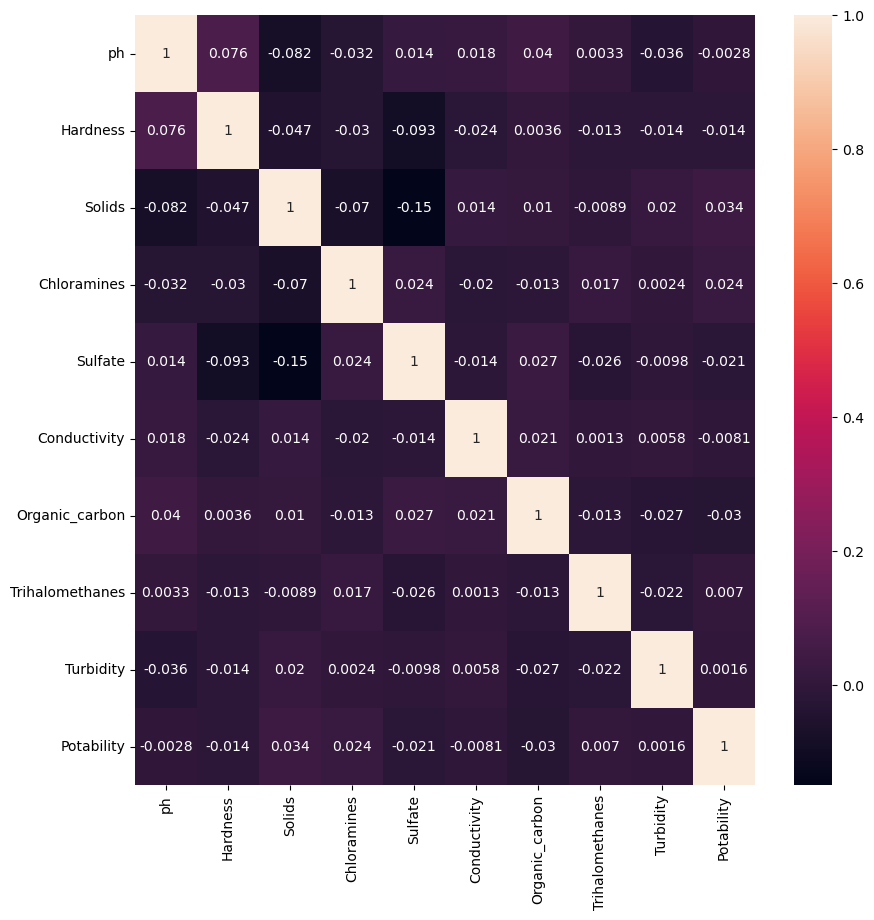

In [16]:
#hEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Here, we can see that Solids is correlating well as per heatmap. Here in this map, potability is showing 0.034(highest positive value) with relation to Solids.

In [17]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

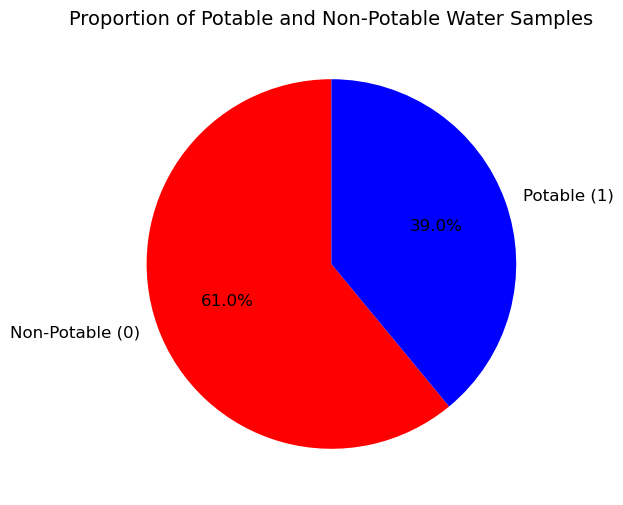

In [18]:
potable_count = df['Potability'].value_counts()

# Labels for the pie chart
labels = ['Non-Potable (0)', 'Potable (1)']

# Data for the pie chart
sizes = [potable_count.get(0, 0), potable_count.get(1, 0)]  # Ensure we handle missing keys

# Colors for the pie chart
colors = ['red', 'blue']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Proportion of Potable and Non-Potable Water Samples', fontsize=14)
plt.show()

In [19]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [20]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [21]:
x.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.068685   196.369496  22014.092526     7.122277   333.757711   
std       1.470239    32.879761   8768.570828     1.583085    36.142627   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.000000   196.967627  20927.833607     7.130299   333.700000   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.391531     3.966786  
std       80.824064        3.308162        15.769895     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.300000     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

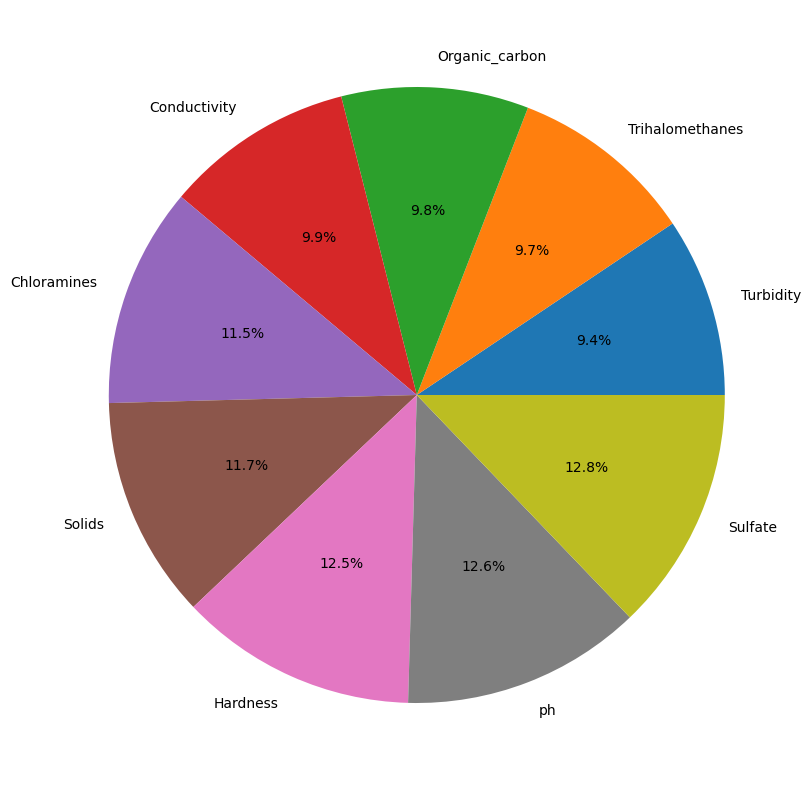

In [22]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

change in pie chart- make the sizes acc to their percentage

In the pie chart we can see how the importance of each component is very similar to that of the others. It is visible that importance of each of the components is very similar to that of the others. That is why we have decided that there is no variable worth eliminating, since if we eliminate, for example, Turbidity there is no reason not to eliminate Conductivity or Solids as well since it is obvious that all of them have a very similar importance.

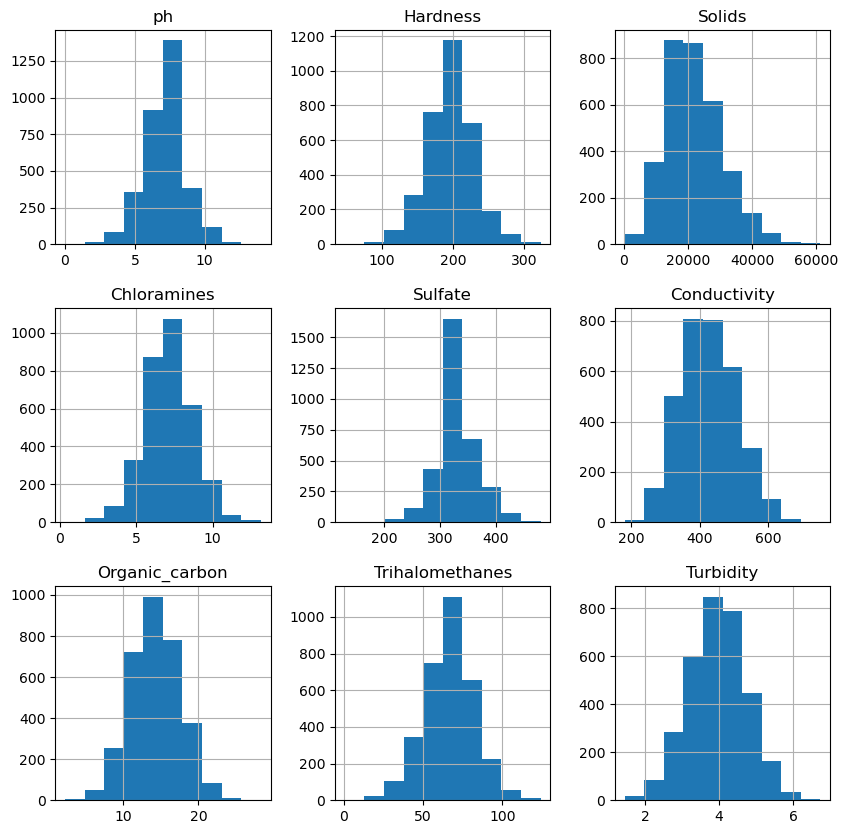

In [23]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

All features have a very similar distribution of their values. In addition, they all show a very gaussian form so there is no need to normalize any feature.

<Axes: xlabel='ph', ylabel='Count'>

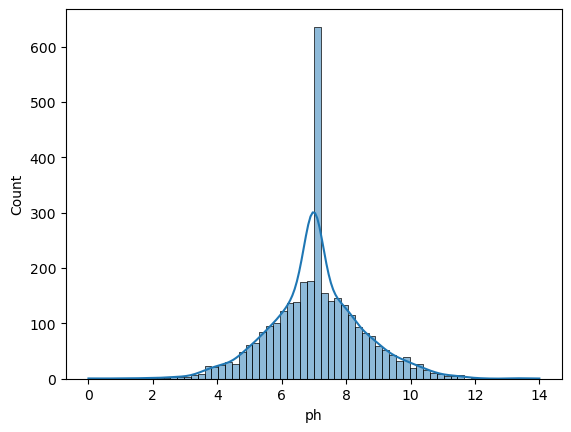

In [24]:
sns.histplot(df.ph,kde = True)

We represented the distribution of ph variable by counting the number of observations that fall within disrete bins. We use kde parameter which if True, computes a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s) which is only relevant with univariate data.

In [25]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

count        mean        std      min         25%    50%  \
ph               3276.0    7.068685   1.470239    0.000    6.277673    7.0   
Sulfate          3276.0  333.757711  36.142627  129.000  317.094638  333.7   
Trihalomethanes  3276.0   66.391531  15.769895    0.738   56.647656   66.3   

                        75%         max  
ph                 7.870050   14.000000  
Sulfate          350.385756  481.030642  
Trihalomethanes   76.666609  124.000000

<Axes: xlabel='ph', ylabel='Sulfate'>

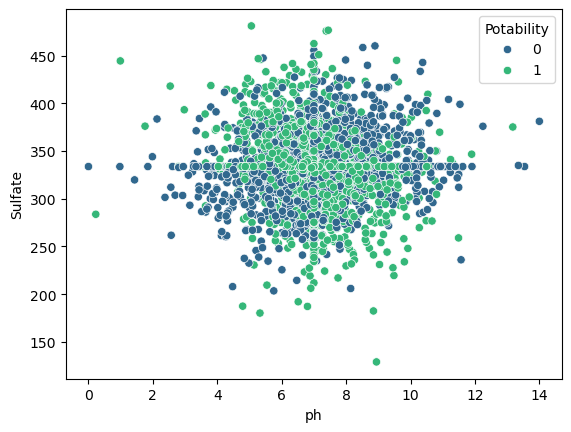

In [26]:
sns.scatterplot(data = df, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

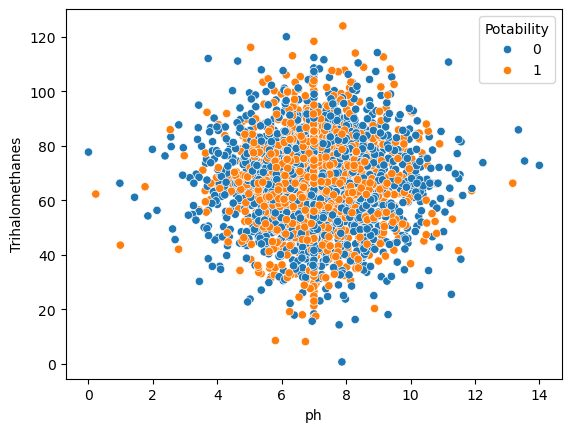

In [27]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")

<Axes: xlabel='Trihalomethanes', ylabel='Sulfate'>

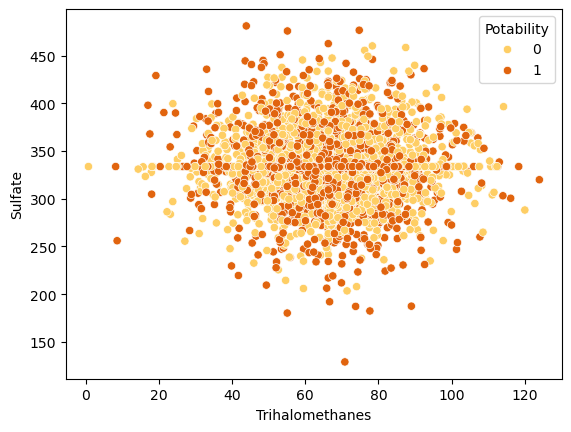

In [28]:
sns.scatterplot(data = df, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="YlOrBr")

We use scatterplot to visualize and represent the values of two variables with 'Potability' as hue (which is a grouping variable). We divide data points into groups based on how closely the sets of points cluster together.

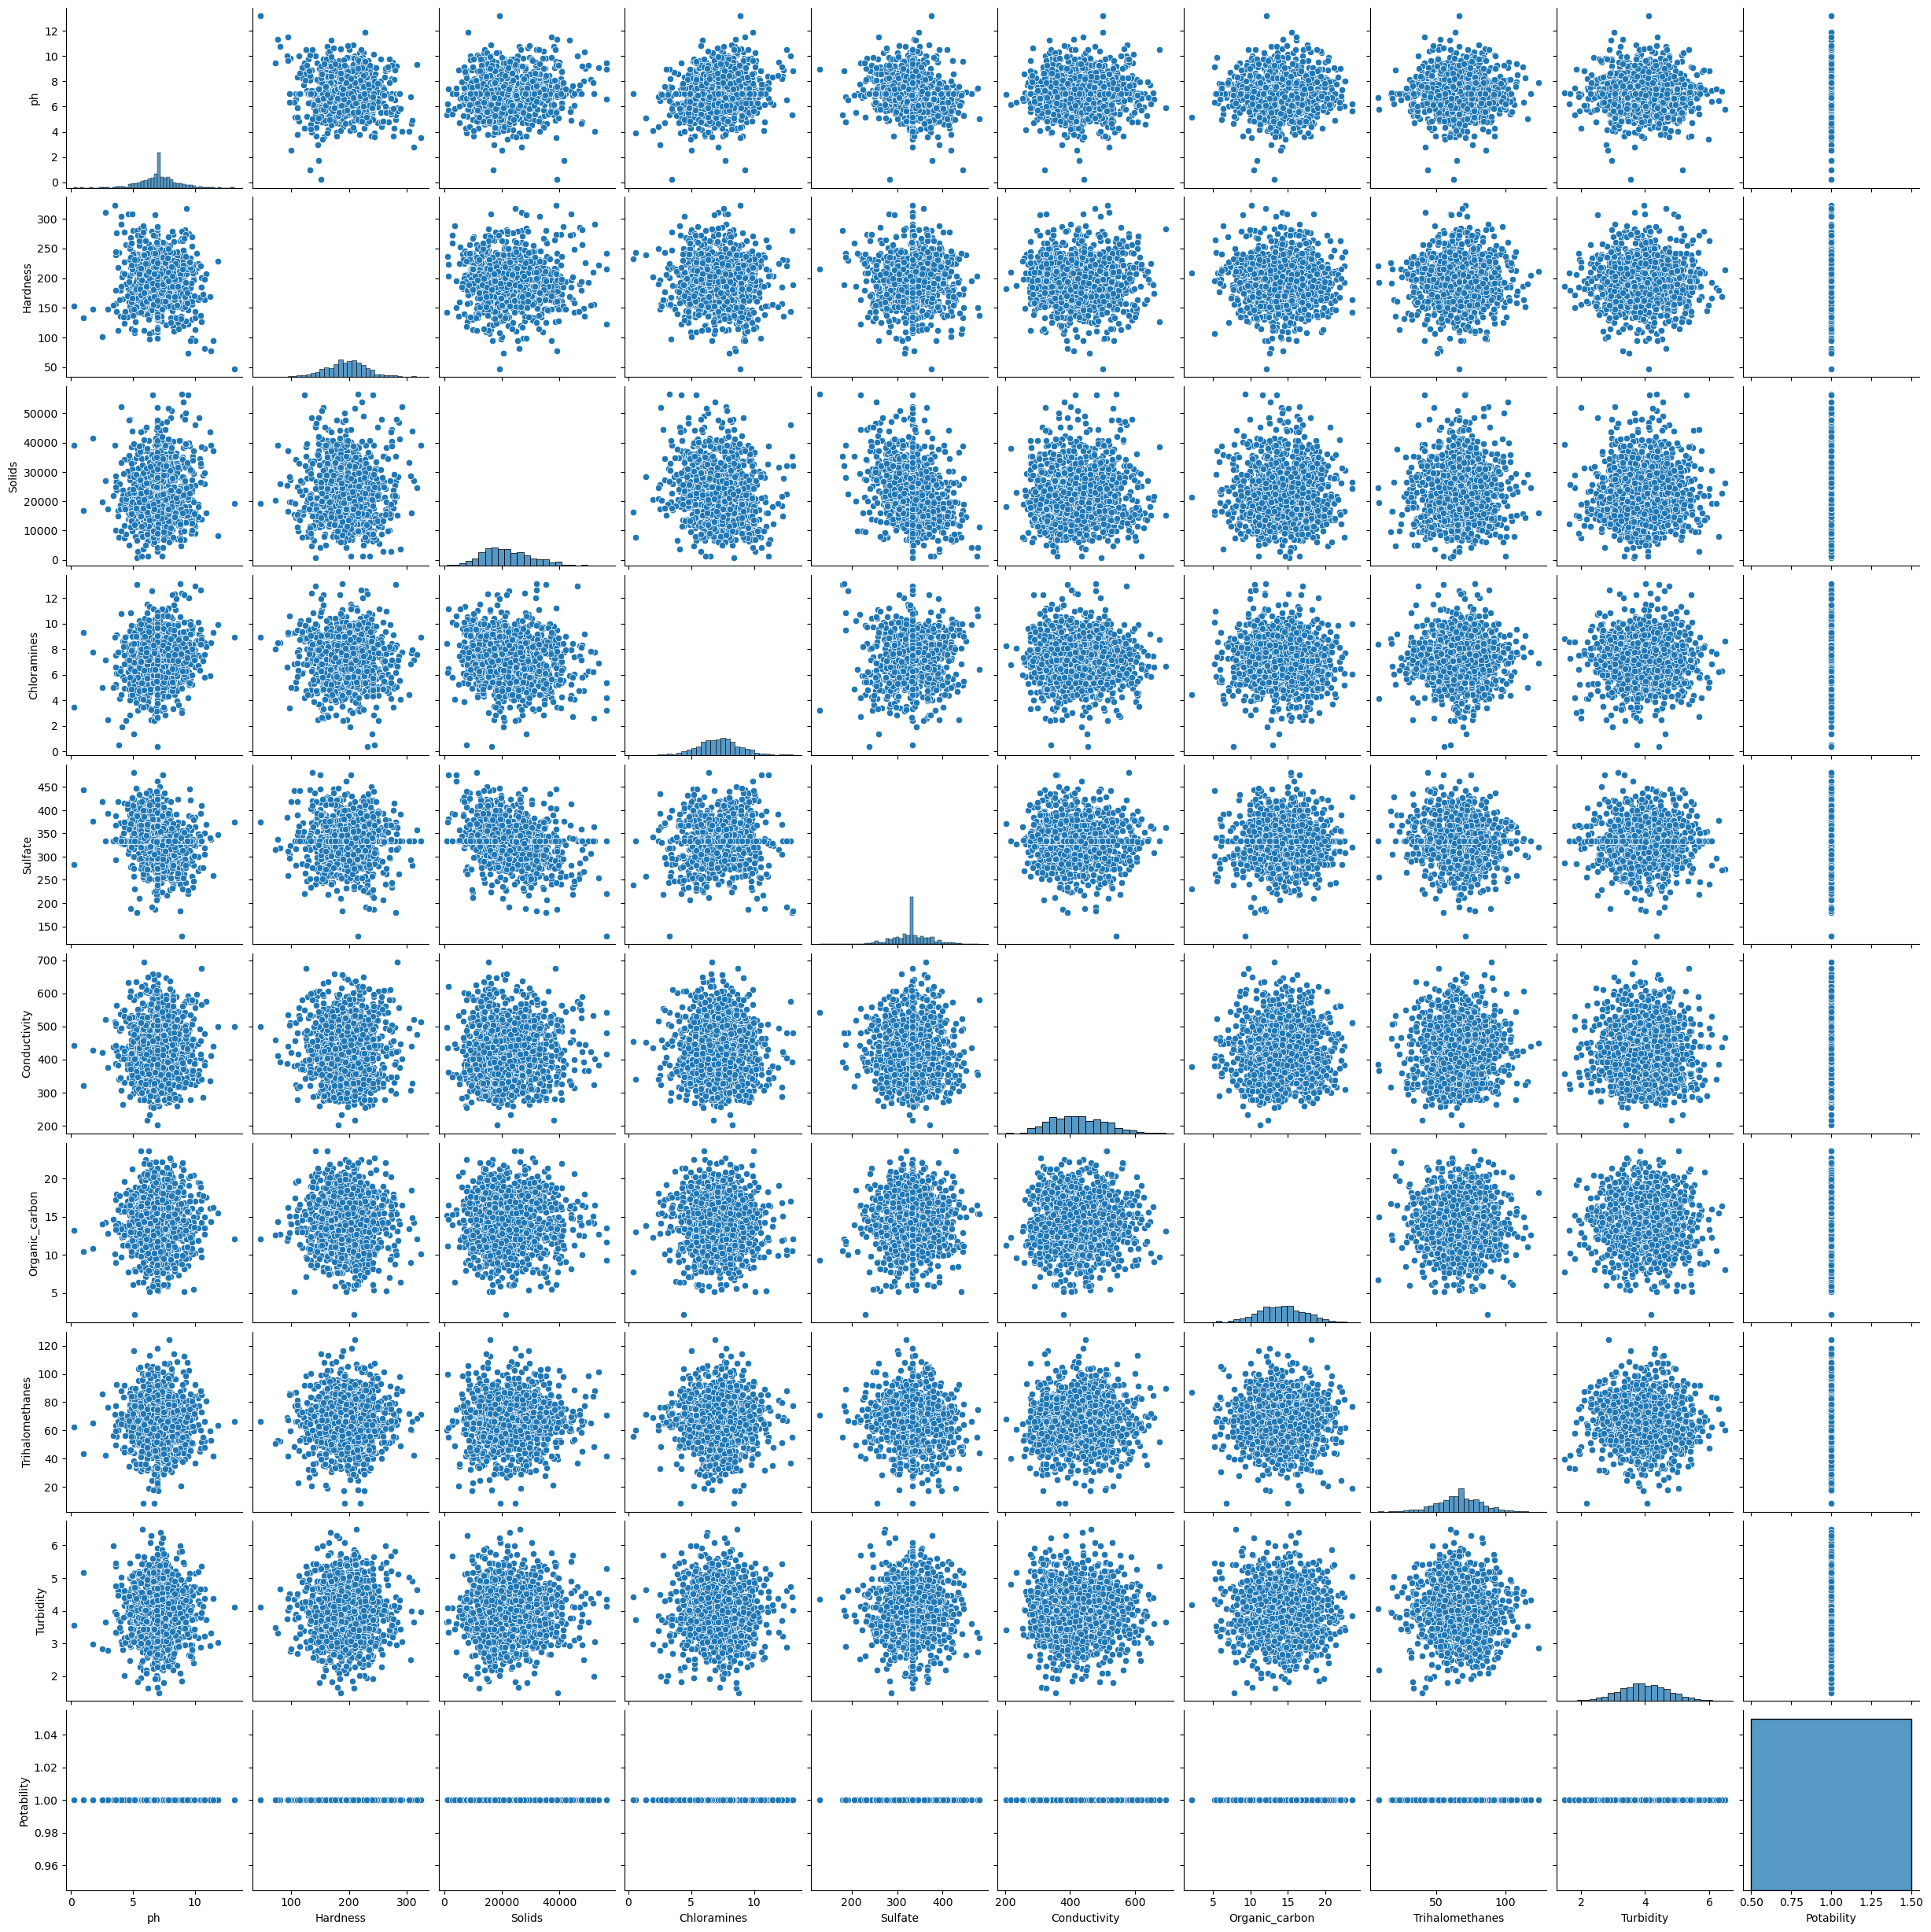

In [29]:
positive = df[df['Potability'] == 1]
sns.pairplot(positive)

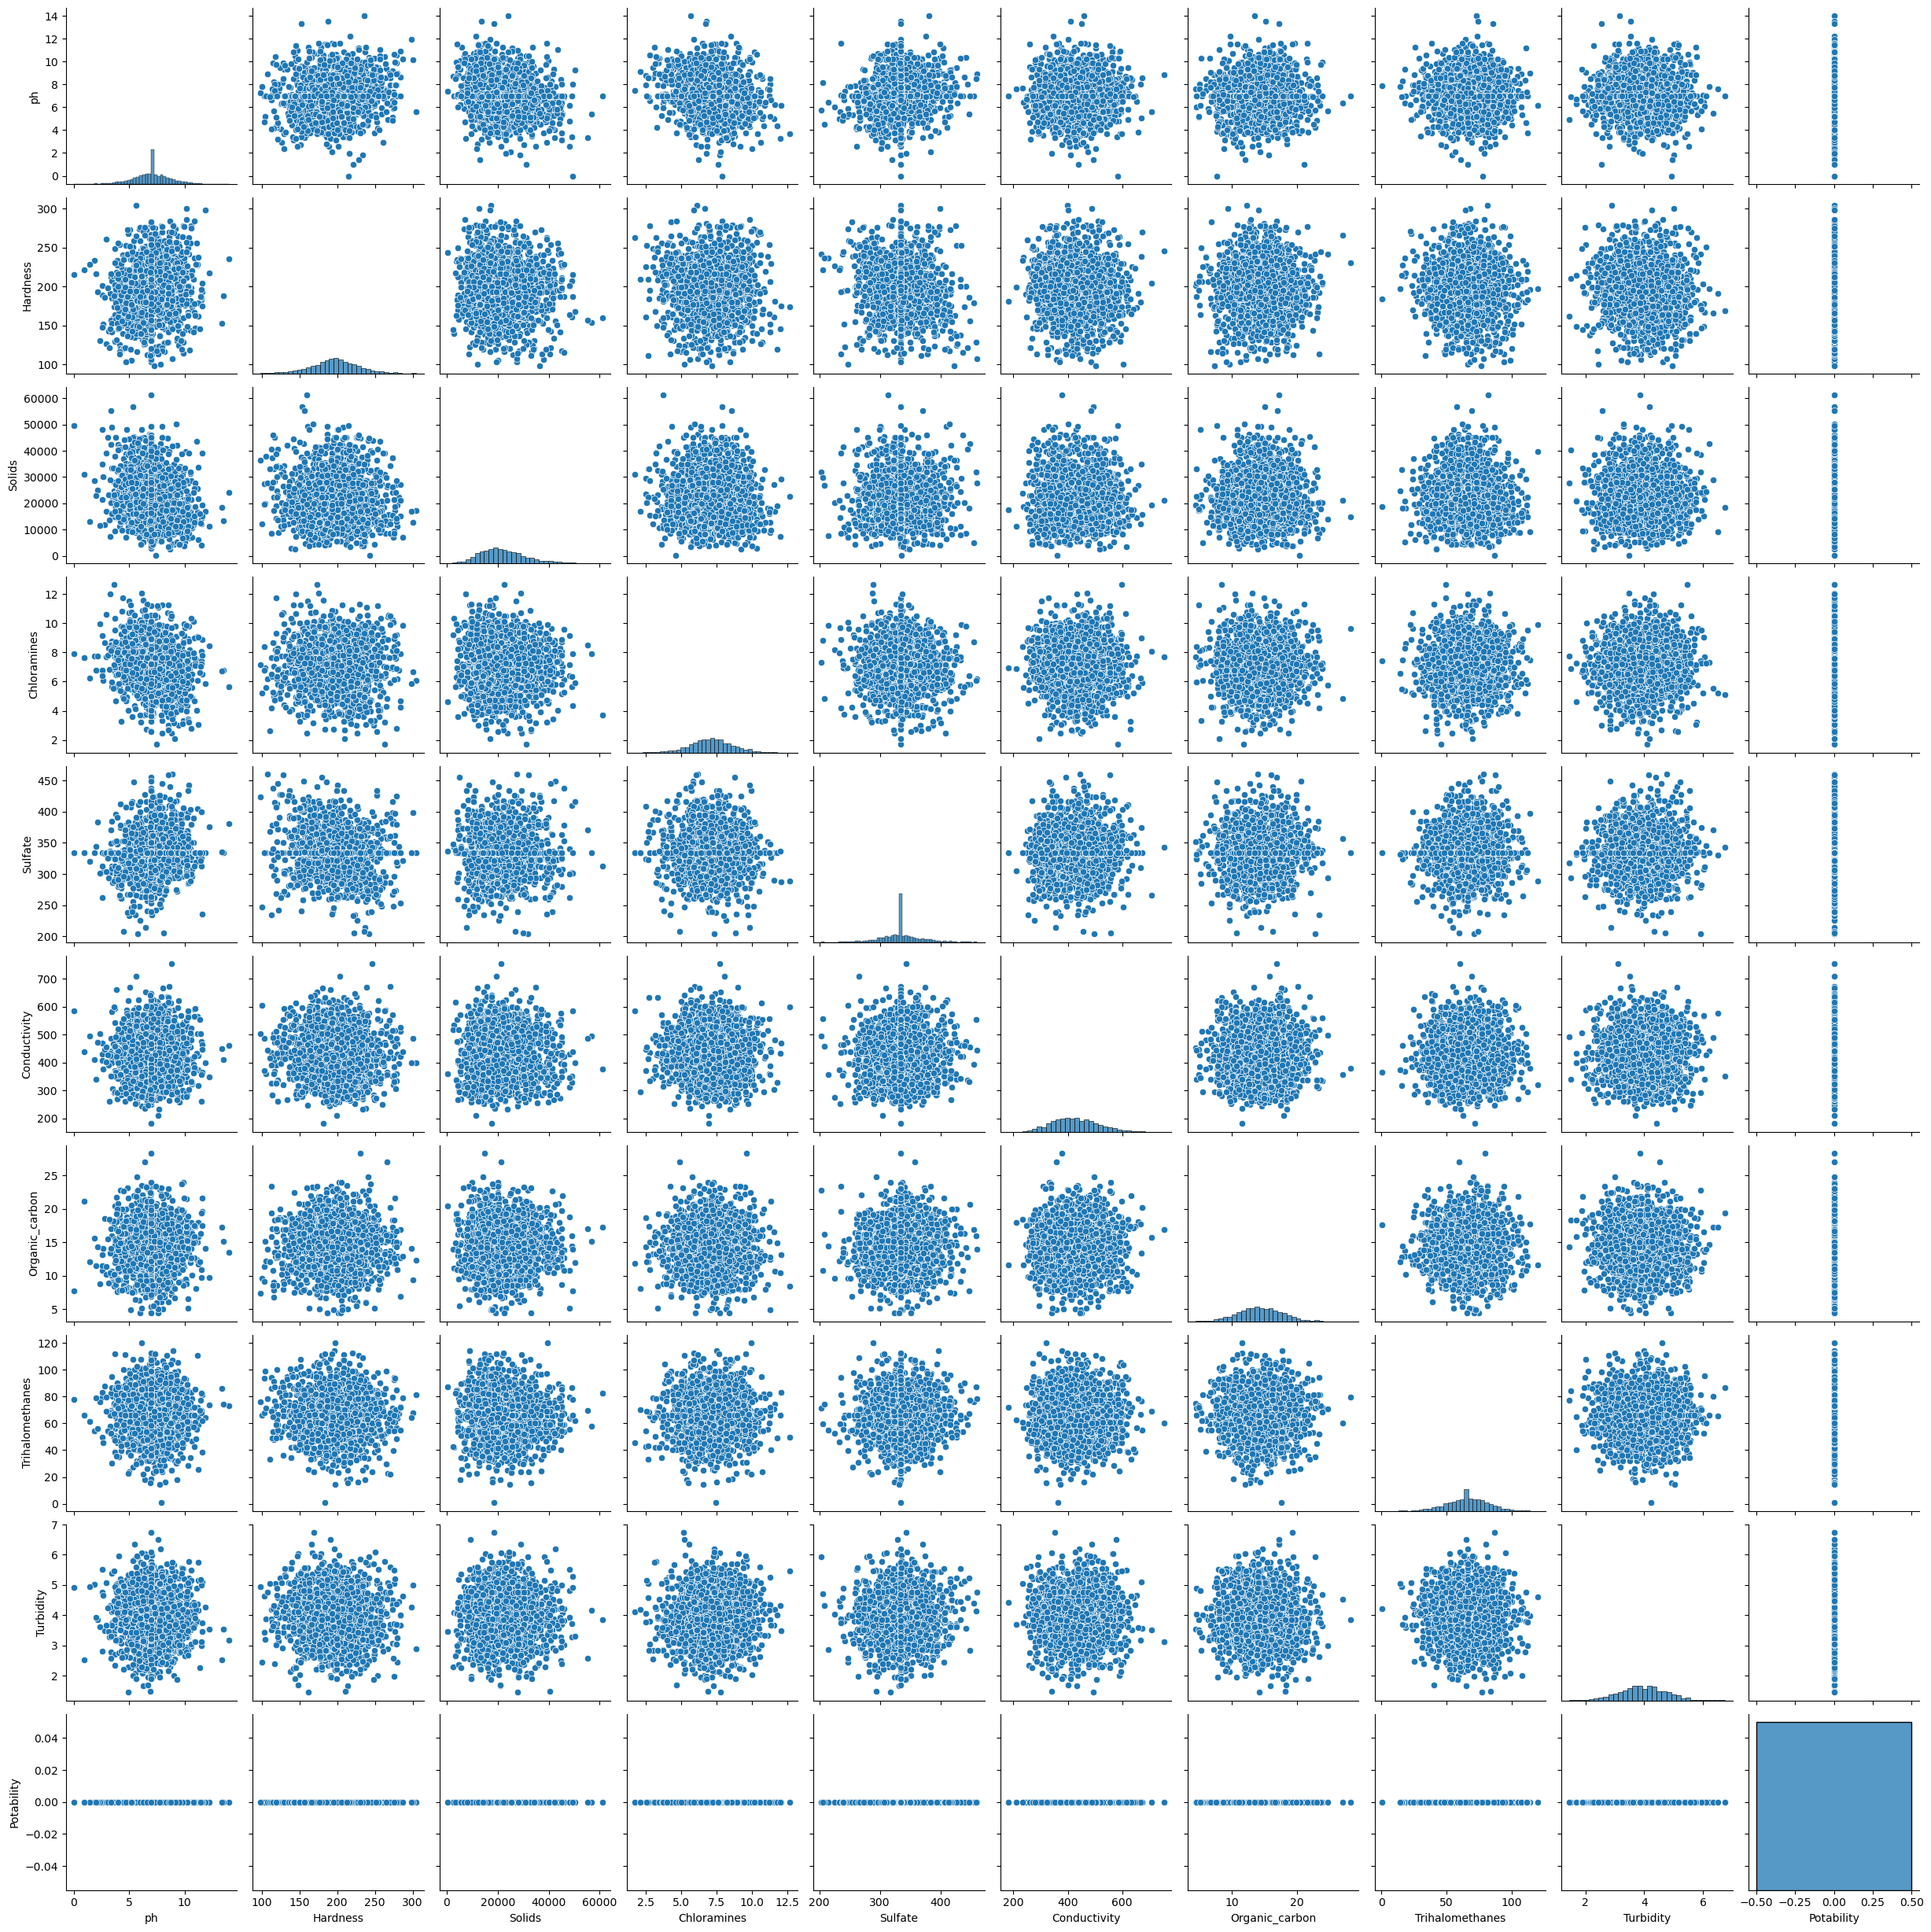

In [30]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)


Using pair plot we can see both the distribution of single variables and relationships between two variables.

**ALGORITHMS**

# KNN IMPLEMENTATION

In [31]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

# Hyperparamter in KNN is

1. k: nearest neigbors which we compute while training the model. default:5
2. p: Power parameter for the minkowski metric. When p = 1, this is equivalent to using manhattan_distance,and euclidean_distance for p = 2.(default = 2)
3. metric: str or callable, default=’minkowski’.The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

# RESULT 1

In [32]:
    #training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

1.k: Here we have taken nearest neighbor as 5(default value).

2.p: Taken p=2 to find euclidean_distance (default value)

3.metric: We have taken default=’minkowski’(default value)

In [33]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  75.578
Test Accuracy :  61.546
Confusion Matrix:
[[437 148]
 [230 168]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       585
           1       0.53      0.42      0.47       398

    accuracy                           0.62       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.62      0.61       983



# RESULT 2

In [34]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

1.k: Here we have taken nearest neighbor as 3.

2.p: Taken p=2 to find euclidean_distance

3.metric: We have taken default=’minkowski’

In [35]:
#printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  81.204
Test Accuracy :  61.546
Confusion Matrix:
[[421 164]
 [214 184]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       585
           1       0.53      0.46      0.49       398

    accuracy                           0.62       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.61      0.62      0.61       983



# RESULT 3

In [36]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

1.k: Here we have taken nearest neighbor as 2.

2.p: Taken p=1 to find manhattan_distance

3.metric: We have taken default=’minkowski’

In [37]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  79.459
Test Accuracy :  62.05500000000001
Confusion Matrix:
[[512  73]
 [300  98]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.25      0.34       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.54       983
weighted avg       0.61      0.62      0.58       983



In [38]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score 
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.37945066124109866
RMSE: 0.6159956665765586
MAE: 0.37945066124109866
R2: -0.5747927672550794


Text(50.722222222222214, 0.5, 'Prediction Label')

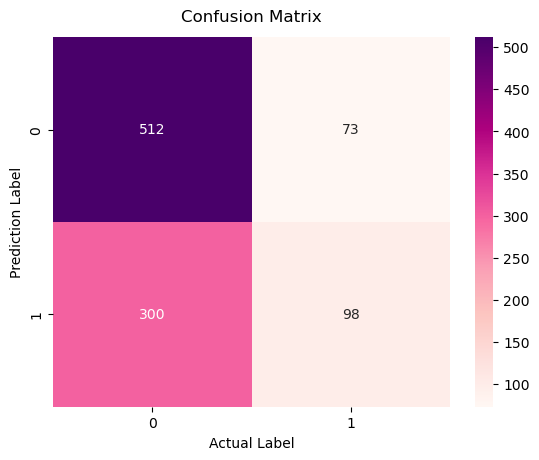

In [39]:
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')


Text(50.722222222222214, 0.5, 'Prediction Label')

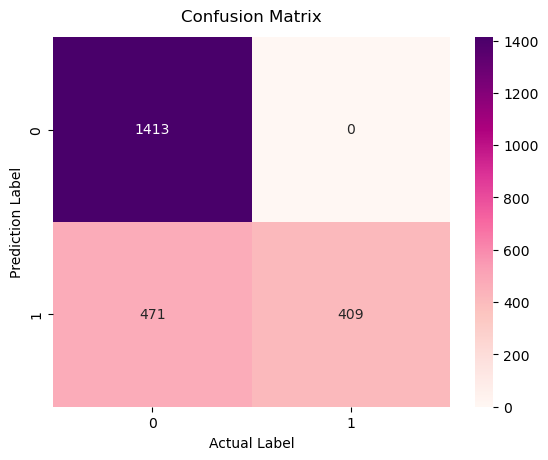

In [40]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# DECISION TREE IMPLEMENTATION

Hyperparamter in Decision Tree is

1.criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
                                                                                                                              
2.max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of
worry as it tends to bring along overfitting as well.(default = 'None')

3.splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.(default='best')

# RESULT 1

In [41]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 66.68
Test Accuracy: 62.970498474059
Confusion Matrix:
[[546  39]
 [325  73]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.65      0.18      0.29       398

    accuracy                           0.63       983
   macro avg       0.64      0.56      0.52       983
weighted avg       0.64      0.63      0.56       983



# RESULT 2

In [42]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 71.0
Test Accuracy: 62.05493387589013
Confusion Matrix:
[[524  61]
 [312  86]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.90      0.74       585
           1       0.59      0.22      0.32       398

    accuracy                           0.62       983
   macro avg       0.61      0.56      0.53       983
weighted avg       0.61      0.62      0.57       983



# RESULT 3

In [43]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 78.63
Test Accuracy: 63.78433367243134
Confusion Matrix:
[[524  61]
 [295 103]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.90      0.75       585
           1       0.63      0.26      0.37       398

    accuracy                           0.64       983
   macro avg       0.63      0.58      0.56       983
weighted avg       0.64      0.64      0.59       983



In [44]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

0.3621566632756867
0.6017945357642314
0.3621566632756867
-0.5030193703560544


Text(50.722222222222214, 0.5, 'Prediction Label')

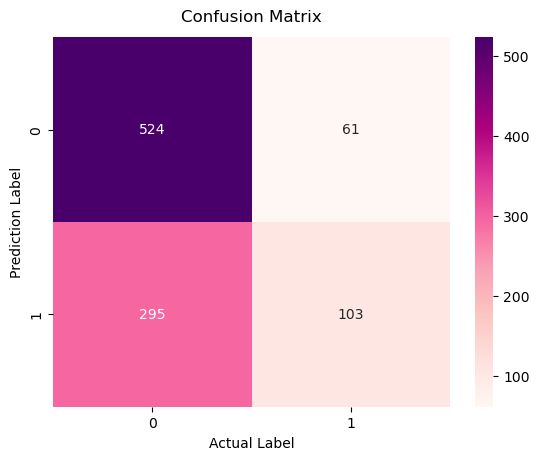

In [45]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

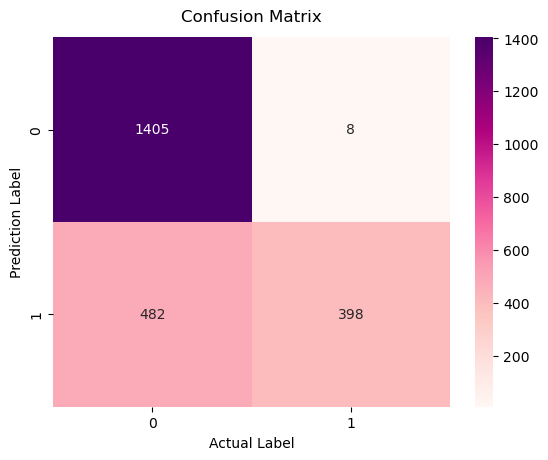

In [46]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Training Accuracy: 66.68120366332315 %
Testing Accuracy: 62.970498474059 %


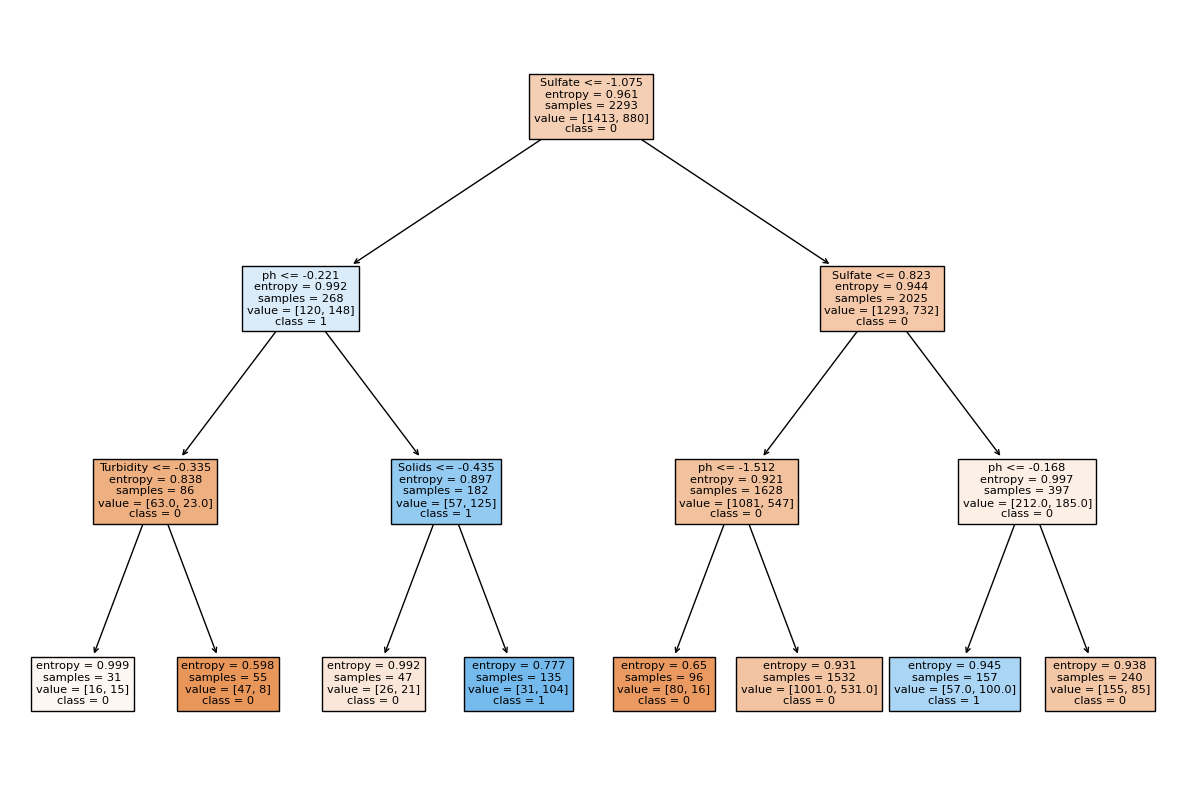

In [47]:
# Train the decision tree model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

# Print accuracy scores
print("Training Accuracy:", metrics.accuracy_score(y_train, model.predict(x_train)) * 100, "%")
print("Testing Accuracy:", metrics.accuracy_score(y_test, model.predict(x_test)) * 100, "%")

# Prepare the feature names and class names
if hasattr(y_train, "unique"):
    class_names = [str(label) for label in y_train.unique()]  # Extract unique class names and convert to strings
else:
    class_names = [str(label) for label in set(y_train)]  # Handle other iterable types

if hasattr(x_train, "columns"):
    feature_names = x_train.columns.tolist()  # Use columns from DataFrame
else:
    raise ValueError("x_train must be a DataFrame to provide feature names.")

# Plot the decision tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(
    model,
    impurity=True,
    class_names=class_names,
    feature_names=feature_names,
    filled=True,
    ax=ax
)
plt.show()


# RANDOM FOREST IMPLEMENTATION

Hyperparamter in Random Forest is

1.criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
                                                                                                                              
2.max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
                                                                                                                              
3.n_estimators: n_estimators is the parameter used here to predict accuracy, it is the number of trees in the foreset.(default = 100)
                                                                                                                              

# RESULT 1

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)


Confusion Matrix:
[[547  38]
 [320  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.94      0.75       585
           1       0.67      0.20      0.30       398

    accuracy                           0.64       983
   macro avg       0.65      0.57      0.53       983
weighted avg       0.65      0.64      0.57       983

Accuracy: 63.58087487283826


# RESULT 2

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[556  29]
 [325  73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       585
           1       0.72      0.18      0.29       398

    accuracy                           0.64       983
   macro avg       0.67      0.57      0.53       983
weighted avg       0.67      0.64      0.57       983

Accuracy: 63.98779247202442


# RESULT 3

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[518  67]
 [279 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       585
           1       0.64      0.30      0.41       398

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.65      0.65      0.61       983

Accuracy: 64.80162767039674


Parameters	Accuracy
criterion:entropy,max_depth:3,splitter:best	                    Train: 66.68 , Test:62.9705

criterion:entropy,max_depth:12,splitter:random              	Train: 72.13 , Test:62.4618

criterion:entropy,max_depth:12,splitter:best	                Train: 78.59 , Test: 63.5808

In [54]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,rf_pred))

0.35198372329603256
0.5932821616196062
0.35198372329603256
-0.4607997251213336


Text(50.722222222222214, 0.5, 'Prediction Label')

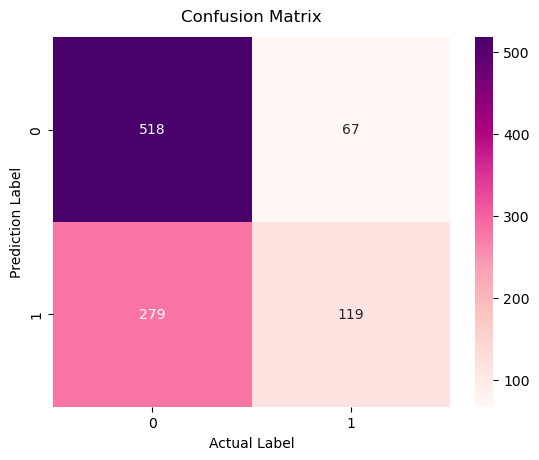

In [55]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

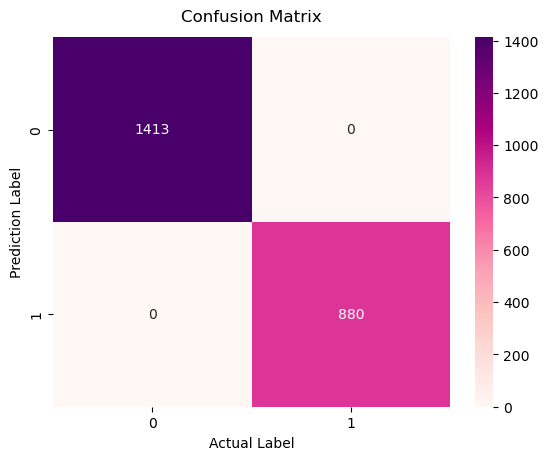

In [56]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [57]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

importance
feature                    
ph                    0.124
Hardness              0.124
Solids                0.117
Sulfate               0.117
Chloramines           0.112
Turbidity             0.103
Organic_carbon        0.102
Conductivity          0.101
Trihalomethanes       0.101

<Axes: xlabel='feature'>

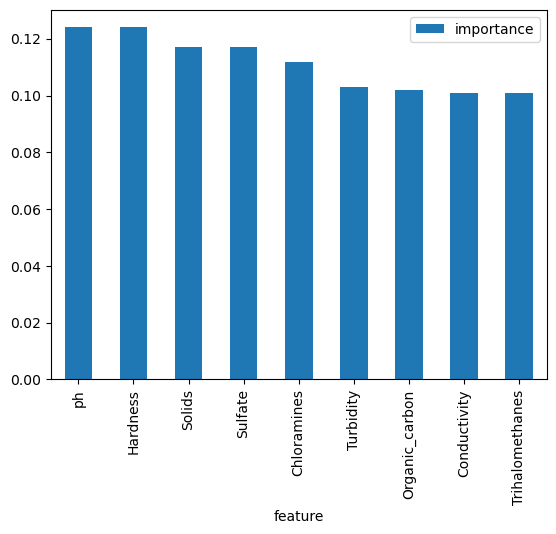

In [58]:
importances.plot.bar()

# XGBOOST

Hyperparameters in XGBoost:

1.learning_rate: It’s a regularization parameter. Shrinks feature weights in each boosting step. (Can range from 0-1; increases accuracy when increased).

2.max_depth: Maximum tree depth. (Can range from 0-infinity; increases accuracy when increased)

3.n_estimators: Number of trees boosted. (Can range from 1-infinity; decreases accuracy when increased; default value = 100)

4.scale_pos_weight: Dealing with imbalanced data. (increases accuracy when increased)

# RESULT 1

In [59]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5, 
                            n_estimators = 100,
                              scale_pos_weight=2)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  38.37767117313563
Accuracy on testing data :  40.4883011190234


In [61]:


# Predict the test set labels
y_pred = xgb_model.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       585
           1       0.40      1.00      0.58       398

    accuracy                           0.40       983
   macro avg       0.20      0.50      0.29       983
weighted avg       0.16      0.40      0.23       983

Confusion Matrix:
 [[  0 585]
 [  0 398]]


# RESULT 2

In [62]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,
                            max_depth =20, 
                            n_estimators = 80,
                              scale_pos_weight=5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  71.9581334496293
Accuracy on testing data :  46.79552390640895


# RESULT 3

In [64]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5, 
                            n_estimators = 100,
                              scale_pos_weight=1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  61.62232882686437
Accuracy on testing data :  59.5116988809766


In [66]:
xgb_pred = xgb_model.predict(x_test)
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, xgb_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test, xgb_pred))

0.40488301119023395
0.6363041813395807
0.40488301119023395
-0.6803418803418808


Text(50.722222222222214, 0.5, 'Prediction Label')

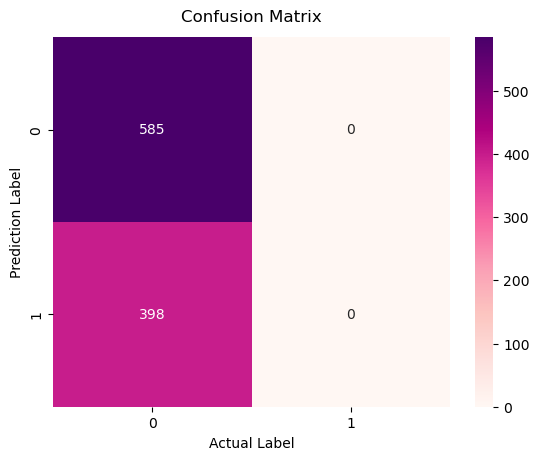

In [67]:
sns.heatmap(data=confusion_matrix(y_test, xgb_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

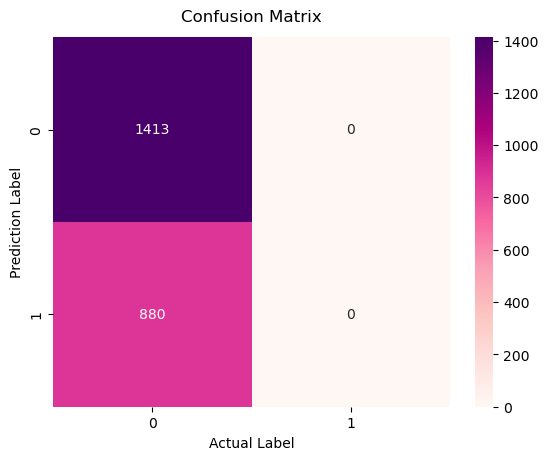

In [68]:
sns.heatmap(data=confusion_matrix(y_train, xgb_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# SVM: SUPPORT VECTOR MACHINE IMPLEMENTATION

In [69]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

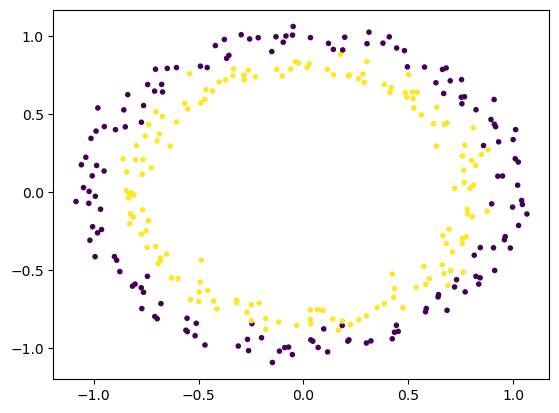

In [70]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

Now that you can see how the data are separated, we can choose a non-linear SVM to start with.

In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF) One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.

# Hyperparamter in SVM is

kernel: In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF)
One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.
This type of model uses the kernel of the normal (or Gaussian) probability density function (PDF) as the basis function. In this, basis function determines the spacing between the different basis functions that combine to form the model

In [71]:
classifier1 = svm.SVC(kernel='rbf')

classifier1.fit(x_train,y_train)

x_train_prediction = classifier1.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)* 100

print('Accuracy on training data : ', training_data_accuray)

x_test_prediction = classifier1.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)* 100

print('Accuracy on test data : ', test_data_accuray)

result = confusion_matrix(y_test,x_test_prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, x_test_prediction)
print("Classification Report:",)
print (result1)

Accuracy on training data :  73.222852158744
Accuracy on test data :  66.63275686673448
Confusion Matrix:
[[541  44]
 [284 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       585
           1       0.72      0.29      0.41       398

    accuracy                           0.67       983
   macro avg       0.69      0.61      0.59       983
weighted avg       0.68      0.67      0.62       983



# FURTHER EVALUATION

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[1256,  157],
       [ 618,  262]], dtype=int64)

The first row is about the not-potable-predictions: 1200 values were correctly classified as not potable for water consumption (called true negatives) and 188 were wrongly classified as not potable (false positives). The second row is about the ptable-predictions: 610 values were wrongly classified as potable (false negatives) and 295 were correctly classified as survived (true positives).

In [73]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.6252983293556086
Recall: 0.29772727272727273


In [74]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.403387220939184

# RESULT

From the results obtained, Support Vector Machine is a preferable method. It did not suffer the condition of overfitting and performed well when there is a clear indication of separation between classes. SVM Classifier in comparison to other classifiers have better computational complexity and even if the number of positive and negative examples are not same, SVM has the ability to normalize the data or to project into the space of the decision boundary separating the two classes. Other reason to say that SVM is better than other algorithms is the reason that it can also perform in n-Dimensional space. Random Forest performed well, however it shows overfitting, hence it isn’t preferred.

# CONCLUSION

After experimenting and trying out different algorithms the conclusion drawn was that “pH” is the attribute which majorly affects the quality of water samples.